<a href="https://colab.research.google.com/github/gsb3501/2023bigdatamarketing/blob/main/20230906.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류모형

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv")
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [4]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [6]:
Y = df['할인민감여부']

In [7]:
num = ['총매출액',  '평균 구매주기','방문빈도', '총 할인 금액']
cg = ['구매금액대', '구매유형', '클레임접수여부']

In [8]:
X = df[num+cg]

In [9]:
ct = ColumnTransformer([("scaling", StandardScaler(), num),("onehot", OneHotEncoder(), cg)])

In [10]:
ct

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '평균 구매주기', '방문빈도', '총 할인 금액']),
                                ('onehot', OneHotEncoder(),
                                 ['구매금액대', '구매유형', '클레임접수여부'])])

In [11]:
ct.fit(X)

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '평균 구매주기', '방문빈도', '총 할인 금액']),
                                ('onehot', OneHotEncoder(),
                                 ['구매금액대', '구매유형', '클레임접수여부'])])

In [12]:
X = ct.transform(X)

In [13]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.154022,-0.463652,-0.047765,-2.564558,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.617306,-0.730610,0.791134,0.523977,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.580691,6.104025,-1.096388,-0.950351,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.529985,0.536445,-0.729370,-2.566793,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.244479,0.377708,-0.676939,-0.411343,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.183073,-0.534056,0.633840,-2.215975,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
996,-0.419801,1.983797,-0.886663,-0.945882,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
997,-0.214446,0.347902,-0.519645,-0.283082,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
998,-0.119219,-0.505395,0.266822,0.494526,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
Y = pd.DataFrame(Y)
Y.describe()

,할인민감여부
count,1000.000000
mean,0.400000
std,0.490143
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [16]:
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
plt.rc("font", family = "NanumBarunGothic")

(array([600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 400.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

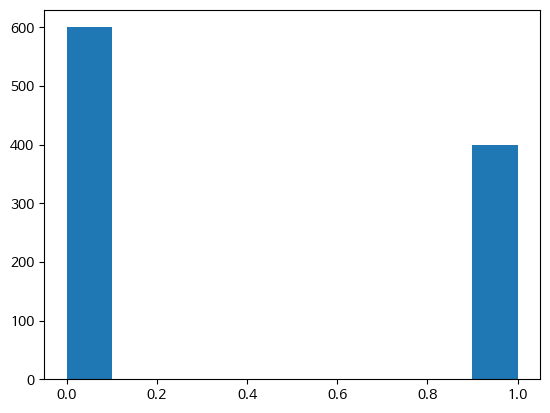

In [18]:
plt.hist(Y)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [20]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,-0.013047,-0.013102,0.022418,-0.029651,0.494286,0.311429,0.194286,0.128571,0.372857,0.202857,0.295714,0.671429,0.328571
std,0.949767,0.962267,0.998648,1.015645,0.500325,0.463409,0.395933,0.334964,0.483910,0.402415,0.456689,0.470030,0.470030
min,-0.683645,-0.985771,-1.148819,-2.579708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.521200,-0.617829,-0.637615,-0.285317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.296831,-0.297114,-0.257489,0.487823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.119929,0.251092,0.371685,0.652383,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,10.626287,6.651376,5.352645,0.967348,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
smote = SMOTE(random_state = 0)

In [22]:
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [23]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,0.073450,-0.041953,0.074119,-0.026003,0.464048,0.303518,0.232434,0.124975,0.381796,0.204548,0.288681,0.667217,0.332783
std,1.033382,0.931739,1.020483,1.014612,0.498187,0.458142,0.421521,0.327290,0.481770,0.399408,0.449083,0.468034,0.468034
min,-0.683645,-0.985771,-1.148819,-2.579708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.507094,-0.624790,-0.624508,-0.282524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.259193,-0.309757,-0.205058,0.489163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.221835,0.170861,0.424116,0.648249,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,10.626287,6.651376,5.352645,0.967348,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
mlp_c = MLPClassifier(solver = 'lbfgs', alpha = 0.001, hidden_layer_sizes = [50, 50])

In [26]:
mlp_c.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.001, hidden_layer_sizes=[50, 50], solver='lbfgs')

In [27]:
Y_pred_mlp = mlp_c.predict(X_test)
Y_pred_mlp

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [28]:
mlp_c.score(X_train, Y_train) #모델에 X_train을 넣어서 Y_train랑 비교 : f(x)가 잘 구해졌냐, f(x)의 성능 (과거의 데이터를 설명하는 성능)

1.0

In [29]:
mlp_c.score(X_test, Y_test) #모델에 X_test를 넣어서 그걸 Y_test랑 비교 : f(x)가 예측을 잘하냐 (f의 예측 성능)

0.7833333333333333

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_mlp))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       177
           1       0.74      0.73      0.73       123

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



# DNN (Deep Neural Network)

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation #신경망의 모양, 함수
from keras.metrics import Accuracy

In [82]:
np.random.seed(0)
tf.random.set_seed(0)

In [34]:
dnn = keras.models.Sequential()
# sequence 한 모델을 백지에 만듦

In [35]:
dnn

In [36]:
X_train.columns


RangeIndex(start=0, stop=13, step=1)

In [37]:
# 백지위에다가 층을 만듬
dnn.add(keras.layers.Dense(64, input_dim= 13, activation = 'relu'))

In [38]:
dnn.add(keras.layers.Dense(64, activation = 'sigmoid'))

In [39]:
dnn.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [40]:
dnn.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = dnn.fit(X_train, Y_train, validation_split=0.2, epochs = 100, batch_size = 64,
                  verbose = 'auto') #epoch : 시도횟수

In [42]:
history

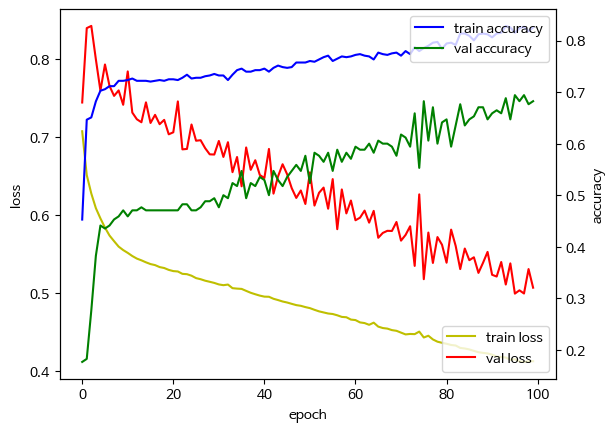

In [43]:
fig, loss = plt.subplots()
acc = loss.twinx()

loss.plot(history.history['loss'], 'y', label = "train loss")
loss.plot(history.history['val_loss'], 'r', label = "val loss")
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(loc = "lower right")

acc.plot(history.history['accuracy'], 'b', label = "train accuracy")
acc.plot(history.history['val_accuracy'], 'g', label = "val accuracy")
acc.set_xlabel("epoch")
acc.set_ylabel("accuracy")
acc.legend(loc = 'upper right')

In [ ]:
history = dnn.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 'auto')

In [ ]:
Y_pred_dnn = dnn.predict(X_test)
Y_pred_dnn

In [ ]:
Y_pred_dnn_class = np.round(Y_pred_dnn, 0)
Y_pred_dnn_class

In [47]:
Y_pred_dnn_class_df = pd.DataFrame(Y_pred_dnn_class)

In [48]:
dnn.evaluate(X_train, Y_train)

27/27 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.9173


[0.29978489875793457, 0.9172576665878296]

In [49]:
dnn.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7933


[0.46083205938339233, 0.7933333516120911]

In [50]:
print(classification_report(Y_test, Y_pred_dnn_class_df))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       177
           1       0.79      0.68      0.73       123

    accuracy                           0.79       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.79      0.79       300



# 회귀모형

In [51]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [52]:
Y = df[df.이탈여부 == 0]['1회 평균매출액']

In [53]:
Y.describe()

count    7.000000e+02
mean     2.996386e+05
std      2.377558e+05
min      2.708200e+04
25%      1.577660e+05
50%      2.372125e+05
75%      3.645740e+05
max      2.672915e+06
Name: 1회 평균매출액, dtype: float64

In [54]:
Y = np.log1p(Y)
Y

300    12.497462
301    11.770841
302    12.592046
303    12.545498
304    12.335029
         ...    
995    12.804250
996    13.253104
997    12.779248
998    12.125285
999    12.506888
Name: 1회 평균매출액, Length: 700, dtype: float64

In [55]:
num = ['총매출액',  '평균 구매주기','방문빈도', '총 할인 금액']
cg = ['구매금액대', '구매유형', '클레임접수여부']

In [62]:
X = df[df.이탈여부 == 0][num+cg]

In [63]:
ct = ColumnTransformer([('scaling', StandardScaler(), num),('onehot', OneHotEncoder(sparse=False), cg)])
ct
#ColumnTransformer([(),()])

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '평균 구매주기', '방문빈도', '총 할인 금액']),
                                ('onehot', OneHotEncoder(sparse=False),
                                 ['구매금액대', '구매유형', '클레임접수여부'])])

In [64]:
ct.fit(X)

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '평균 구매주기', '방문빈도', '총 할인 금액']),
                                ('onehot', OneHotEncoder(sparse=False),
                                 ['구매금액대', '구매유형', '클레임접수여부'])])

In [65]:
X = ct.transform(X)

In [66]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.235245,-0.638484,-0.394069,0.780642,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.630364,-0.448963,-0.394069,0.115720,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.439664,0.557334,-0.693795,0.661568,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2.255074,-0.950654,2.353424,0.577625,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.481052,-0.740253,0.754882,0.727789,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.021424,-0.519688,0.455156,-2.200025,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
696,-0.457369,2.998489,-0.993522,-0.937780,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
697,-0.267911,0.712666,-0.643841,-0.279076,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
698,-0.180056,-0.479640,0.105475,0.493727,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [68]:
from sklearn.neural_network import MLPRegressor

In [71]:
mlp_r = MLPRegressor(hidden_layer_sizes = ([50, 50]), activation = 'relu', alpha = 0.001, max_iter = 500)

In [72]:
mlp_r.fit(X_train, Y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=[50, 50], max_iter=500)

In [ ]:
Y_pred_mlp_r = mlp_r.predict(X_test)
Y_pred_mlp_r

In [75]:
mlp_r.score(X_train, Y_train)

0.9344401215614996

In [76]:
mlp_r.score(X_test, Y_test)

0.8310396470079003

In [77]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [78]:
mse = mean_squared_error(Y_pred_mlp_r, Y_test)

In [79]:
mse

0.07119118470241861

In [81]:
rmse = sqrt(mse)
print("rmse : ", rmse)

rmse :  0.266816762408996


# DNN

In [85]:
np.random.seed(0)
tf.random.set_seed(0)

In [86]:
dnn = keras.models.Sequential()
# sequence 한 모델을 백지에 만듦

In [84]:
dnn

In [87]:
X_train.columns


RangeIndex(start=0, stop=13, step=1)

In [88]:
# 백지위에다가 층을 만듬
dnn.add(keras.layers.Dense(64, input_dim= 13, activation = 'relu'))

In [89]:
dnn.add(keras.layers.Dense(64, activation = 'relu'))

In [90]:
dnn.add(keras.layers.Dense(1, activation = 'relu'))

In [91]:
dnn.compile(loss='mse', optimizer = 'SGD')

In [92]:
dnn.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 'auto')

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 50.7711
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0859
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4655
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3797
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4267
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3361
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2661
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1380
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1251
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1103
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1186
Epoch 12/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0945
Epoch 13/100
8/8 [==============================] - 0s 3ms/s

In [93]:
Y_pred_dnn = dnn.predict(X_test)
Y_pred_dnn

7/7 [==============================] - 0s 2ms/step


array([[12.933513 ],
       [12.050194 ],
       [12.037039 ],
       [13.973428 ],
       [11.6340475],
       [12.655984 ],
       [11.5762615],
       [11.924973 ],
       [12.06958  ],
       [12.302038 ],
       [12.415159 ],
       [14.514181 ],
       [12.236859 ],
       [12.060222 ],
       [12.977913 ],
       [12.286302 ],
       [12.782335 ],
       [12.405306 ],
       [12.09272  ],
       [12.4870825],
       [12.841988 ],
       [11.770855 ],
       [12.915348 ],
       [12.534889 ],
       [11.140206 ],
       [13.079208 ],
       [12.742424 ],
       [12.830814 ],
       [11.449113 ],
       [11.97495  ],
       [12.6342945],
       [12.687681 ],
       [12.472737 ],
       [13.680067 ],
       [12.128321 ],
       [12.075251 ],
       [12.343612 ],
       [13.129356 ],
       [12.060375 ],
       [14.49033  ],
       [12.976156 ],
       [12.548235 ],
       [13.412094 ],
       [12.397369 ],
       [12.126501 ],
       [12.811226 ],
       [11.2785   ],
       [12.20

In [95]:
dnn.evaluate(X_train, Y_train)

16/16 [==============================] - 0s 1ms/step - loss: 0.0386


0.03855269029736519

In [96]:
dnn.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0658


0.06581824272871017

In [97]:
mse = mean_squared_error(Y_pred_dnn, Y_test)

In [98]:
mse

0.06581823068268342

In [99]:
rmse = sqrt(mse)
print("rmse : ", rmse)

rmse :  0.2565506396068492


# 앙상블

In [100]:
from sklearn.svm import SVR

In [101]:
svm = SVR()

In [103]:
svm

SVR()

In [102]:
mlp_r

MLPRegressor(alpha=0.001, hidden_layer_sizes=[50, 50], max_iter=500)

In [104]:
from sklearn.ensemble import VotingRegressor

In [105]:
ensem_svm_mlp = VotingRegressor(estimators = [("SVR", svm), ("MLP", mlp_r)])

In [106]:
ensem_svm_mlp

VotingRegressor(estimators=[('SVR', SVR()),
                            ('MLP',
                             MLPRegressor(alpha=0.001,
                                          hidden_layer_sizes=[50, 50],
                                          max_iter=500))])

In [107]:
ensem_svm_mlp.fit(X_train, Y_train)

VotingRegressor(estimators=[('SVR', SVR()),
                            ('MLP',
                             MLPRegressor(alpha=0.001,
                                          hidden_layer_sizes=[50, 50],
                                          max_iter=500))])

In [110]:
ensem_svm_mlp.score(X_train, Y_train)

0.9605154344701187

In [111]:
ensem_svm_mlp.score(X_test, Y_test)

0.9392457450987721

In [113]:
Y_pred_ensem = ensem_svm_mlp.predict(X_test)

In [114]:
mse = mean_squared_error(Y_pred_ensem, Y_test)

In [115]:
mse

0.02559871180153948

In [116]:
print("rmse : ", sqrt(mse))

rmse :  0.15999597432916704
